In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from itertools import cycle, islice
#plt.style.use('ggplot')

In [2]:
df=pd.read_csv('costs.csv')
df.head()

,Unnamed: 0,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought
0,0,2019-08-01,order,fitness,east,167.1768,7
1,1,2019-08-01,order,jog/run,south,297.5084,8
2,2,2019-08-01,order,pilates,south,150.5168,5
3,3,2019-08-01,order,pilates,east,91.9114,7
4,4,2019-08-01,physical_collection,diving,west,90.8194,2


In [3]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought
0,2019-08-01,order,fitness,east,167.1768,7
1,2019-08-01,order,jog/run,south,297.5084,8
2,2019-08-01,order,pilates,south,150.5168,5
3,2019-08-01,order,pilates,east,91.9114,7
4,2019-08-01,physical_collection,diving,west,90.8194,2


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [6]:
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day
0,2019-08-01,order,fitness,east,167.1768,7,8,1
1,2019-08-01,order,jog/run,south,297.5084,8,8,1
2,2019-08-01,order,pilates,south,150.5168,5,8,1
3,2019-08-01,order,pilates,east,91.9114,7,8,1
4,2019-08-01,physical_collection,diving,west,90.8194,2,8,1


In [7]:
df.isnull().sum()

Date                      0
mode_of_purchase          0
sporting_equipment        0
store                     0
estimated_spending        0
number_of_items_bought    0
month                     0
day                       0
dtype: int64

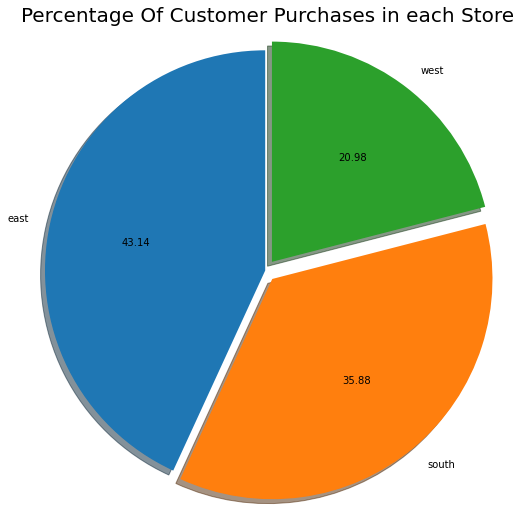

In [8]:
fig1, ax1 = plt.subplots(figsize=(9,9))
explode=(0,0.05, 0.05)
plt.pie(df['store'].value_counts(),labels=df['store'].unique(), explode=explode,shadow=True,
        startangle=90,autopct='%.2f')
ax1.axis('equal');
ax1.set_title('Percentage Of Customer Purchases in each Store',fontdict={'size':20});

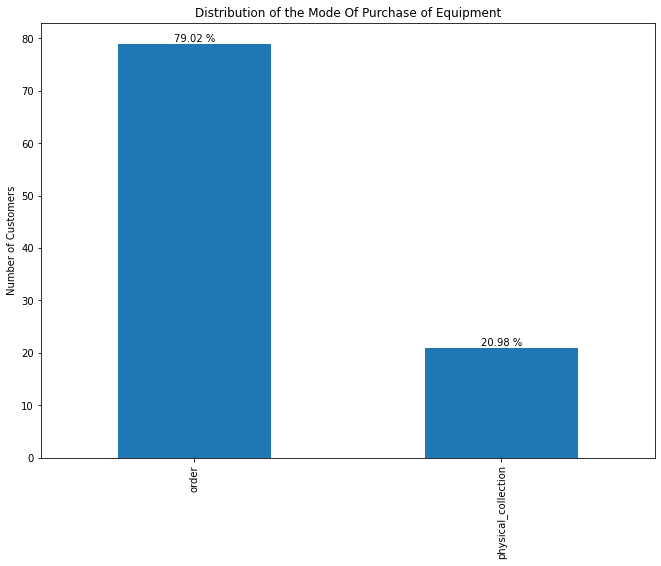

In [9]:
plt.figure(figsize=(11,8))
ax = (df['mode_of_purchase'].value_counts()/len(df['mode_of_purchase'])*100).plot.bar(rot=90)
ax.bar_label(ax.containers[0], fmt='%.2f %%')
ax.margins(x=12)
plt.ylabel('Number of Customers')
plt.title('Distribution of the Mode Of Purchase of Equipment')
plt.show()

In [10]:
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day
0,2019-08-01,order,fitness,east,167.1768,7,8,1
1,2019-08-01,order,jog/run,south,297.5084,8,8,1
2,2019-08-01,order,pilates,south,150.5168,5,8,1
3,2019-08-01,order,pilates,east,91.9114,7,8,1
4,2019-08-01,physical_collection,diving,west,90.8194,2,8,1


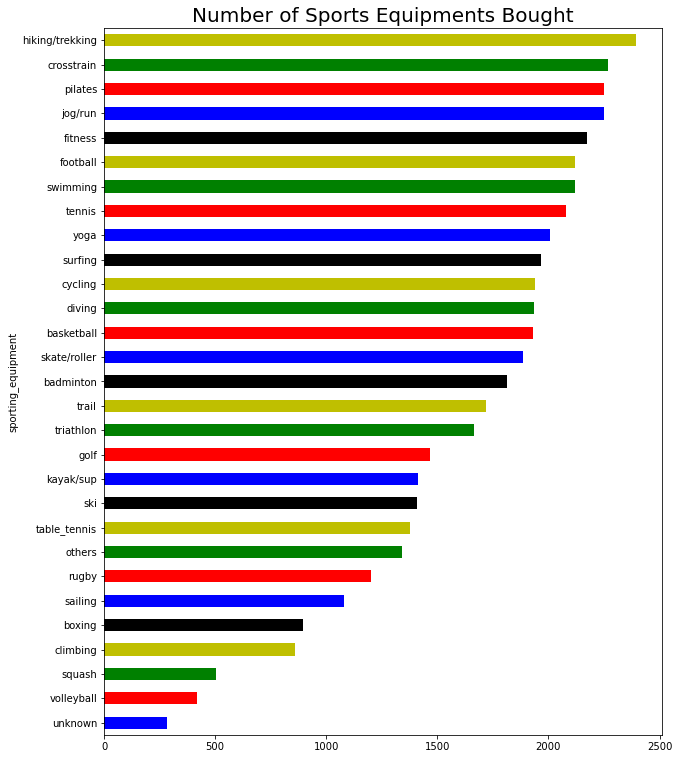

In [42]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
ax=df.groupby('sporting_equipment')['number_of_items_bought'].count().sort_values().plot(kind='barh',figsize=(10,13), color=my_colors)
ax.set_title('Number of Sports Equipments Bought',fontdict={'size':20});

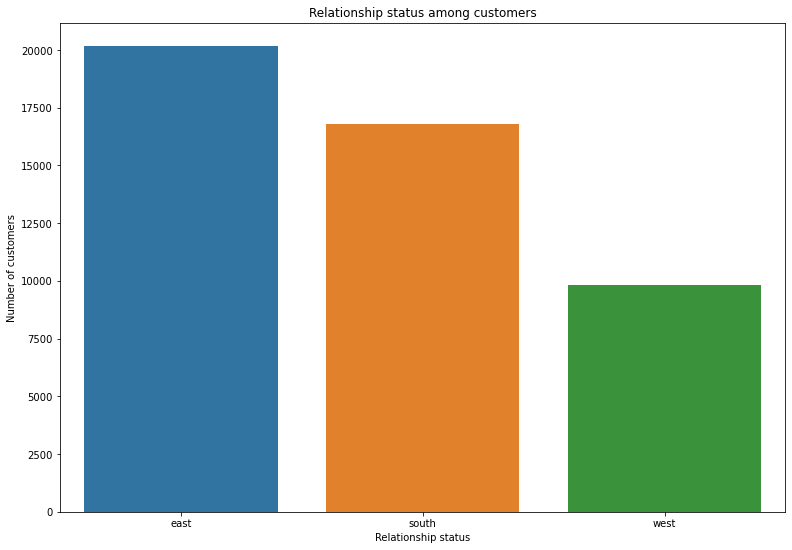

In [46]:
plt.figure(figsize=(13,9))
sns.countplot(x='store', data=df)
plt.xlabel('Relationship status')
plt.ylabel('Number of customers')
plt.title('Relationship status among customers');

In [13]:
df['month']

0         8
1         8
2         8
3         8
4         8
         ..
46758    10
46759    10
46760    10
46761    10
46762    10
Name: month, Length: 46763, dtype: int64

In [14]:
df['seasons']=(pd.cut(df['month'], [3,5,8,11,14], labels=['spring','summer','autumn','Winter'], right=False,include_lowest=True))
df['seasons'].value_counts()

autumn    15658
summer    10361
Winter     7051
spring     6899
Name: seasons, dtype: int64

<AxesSubplot:xlabel='seasons'>

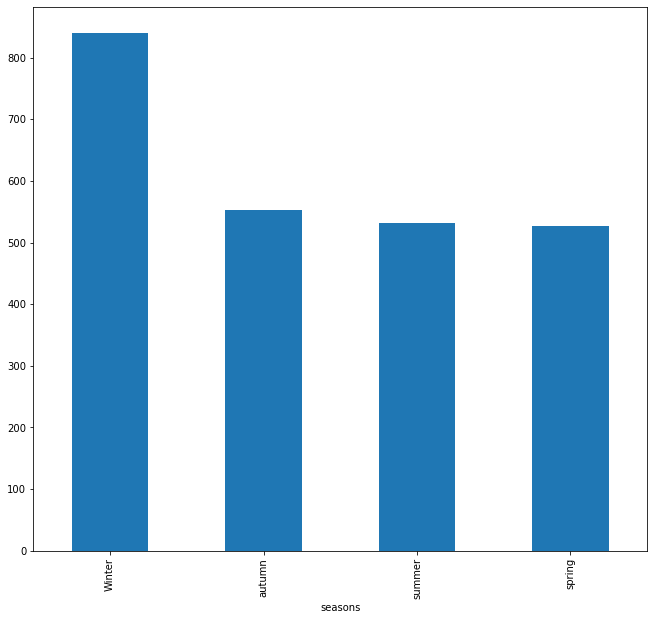

In [48]:
df.groupby('seasons')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(11,10))

In [16]:
df.head(3)

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons
0,2019-08-01,order,fitness,east,167.1768,7,8,1,autumn
1,2019-08-01,order,jog/run,south,297.5084,8,8,1,autumn
2,2019-08-01,order,pilates,south,150.5168,5,8,1,autumn


<AxesSubplot:xlabel='store'>

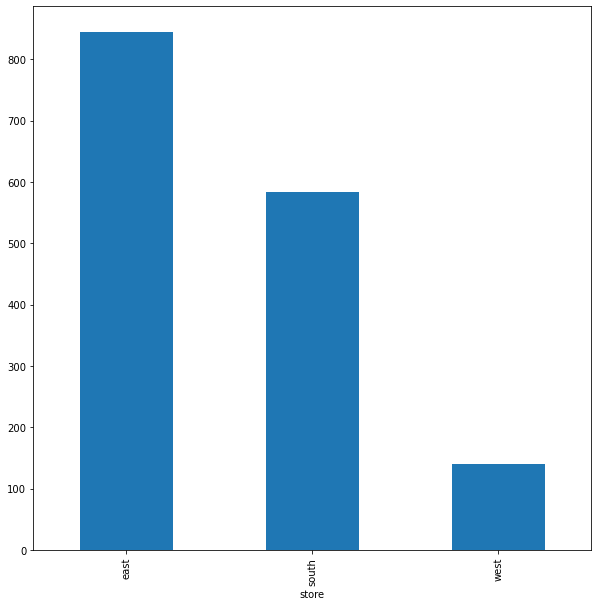

In [17]:
df.groupby('store')['estimated_spending'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))

In [18]:
df['seasons']=(pd.cut(df['month'], [3,5,8,11,14], labels=['spring','summer','autumn','Winter'], right=False,include_lowest=True))
df['seasons'].value_counts()

autumn    15658
summer    10361
Winter     7051
spring     6899
Name: seasons, dtype: int64

In [19]:
df['weekday']=np.where((df['Date'].dt.dayofweek) < 5,'weekday','weekend')

In [20]:
df['weekday'].value_counts()

weekday    33522
weekend    13241
Name: weekday, dtype: int64

In [21]:
df

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday
0,2019-08-01,order,fitness,east,167.176800,7,8,1,autumn,weekday
1,2019-08-01,order,jog/run,south,297.508400,8,8,1,autumn,weekday
2,2019-08-01,order,pilates,south,150.516800,5,8,1,autumn,weekday
3,2019-08-01,order,pilates,east,91.911400,7,8,1,autumn,weekday
4,2019-08-01,physical_collection,diving,west,90.819400,2,8,1,autumn,weekday
...,...,...,...,...,...,...,...,...,...,...
46758,2021-10-31,order,swimming,south,87.588667,4,10,31,autumn,weekend
46759,2021-10-31,order,basketball,south,19.809333,1,10,31,autumn,weekend
46760,2021-10-31,order,triathlon,east,46.942667,1,10,31,autumn,weekend
46761,2021-10-31,order,tennis,south,154.963333,5,10,31,autumn,weekend


<AxesSubplot:xlabel='weekday'>

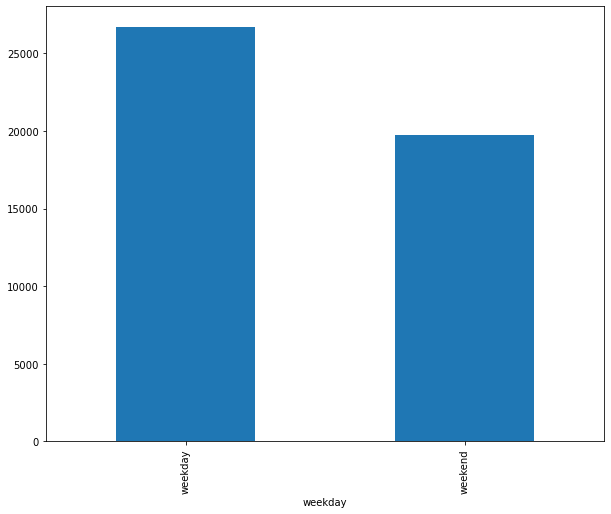

In [22]:
df.groupby('weekday')['estimated_spending'].max().sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

In [23]:
df.groupby('weekday')['estimated_spending','number_of_items_bought'].mean().sort_values(by='estimated_spending',ascending=False)

,estimated_spending,number_of_items_bought
weekday,,
weekday,636.515728,7.900304
weekend,518.045857,6.849634


In [24]:
df

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday
0,2019-08-01,order,fitness,east,167.176800,7,8,1,autumn,weekday
1,2019-08-01,order,jog/run,south,297.508400,8,8,1,autumn,weekday
2,2019-08-01,order,pilates,south,150.516800,5,8,1,autumn,weekday
3,2019-08-01,order,pilates,east,91.911400,7,8,1,autumn,weekday
4,2019-08-01,physical_collection,diving,west,90.819400,2,8,1,autumn,weekday
...,...,...,...,...,...,...,...,...,...,...
46758,2021-10-31,order,swimming,south,87.588667,4,10,31,autumn,weekend
46759,2021-10-31,order,basketball,south,19.809333,1,10,31,autumn,weekend
46760,2021-10-31,order,triathlon,east,46.942667,1,10,31,autumn,weekend
46761,2021-10-31,order,tennis,south,154.963333,5,10,31,autumn,weekend


In [25]:
df.groupby(['sporting_equipment'])['estimated_spending','number_of_items_bought'].mean().sort_values(by='estimated_spending',ascending=False)

,estimated_spending,number_of_items_bought
sporting_equipment,,
hiking/trekking,3610.841787,31.276338
ski,1384.178828,12.161817
jog/run,1322.431171,17.490893
swimming,916.066222,13.299339
crosstrain,572.116406,5.909251
fitness,553.866330,8.034070
surfing,513.277982,6.555160
pilates,501.761503,8.664742
tennis,480.692037,9.321154


In [31]:
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday,unit_price
0,2019-08-01,order,fitness,east,167.1768,7,8,1,autumn,weekday,23.88240
1,2019-08-01,order,jog/run,south,297.5084,8,8,1,autumn,weekday,37.18855
2,2019-08-01,order,pilates,south,150.5168,5,8,1,autumn,weekday,30.10336
3,2019-08-01,order,pilates,east,91.9114,7,8,1,autumn,weekday,13.13020
4,2019-08-01,physical_collection,diving,west,90.8194,2,8,1,autumn,weekday,45.40970


In [33]:
df.head()

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday,unit_price
0,2019-08-01,order,fitness,east,167.1768,7,8,1,autumn,weekday,23.88240
1,2019-08-01,order,jog/run,south,297.5084,8,8,1,autumn,weekday,37.18855
2,2019-08-01,order,pilates,south,150.5168,5,8,1,autumn,weekday,30.10336
3,2019-08-01,order,pilates,east,91.9114,7,8,1,autumn,weekday,13.13020
4,2019-08-01,physical_collection,diving,west,90.8194,2,8,1,autumn,weekday,45.40970


In [35]:
df['Corona_effect']=np.where((df['Date']) > '2020-03-10','corona_effect','before_corona')

In [36]:
df

,Date,mode_of_purchase,sporting_equipment,store,estimated_spending,number_of_items_bought,month,day,seasons,weekday,unit_price,Corona_effect
0,2019-08-01,order,fitness,east,167.176800,7,8,1,autumn,weekday,23.882400,before_corona
1,2019-08-01,order,jog/run,south,297.508400,8,8,1,autumn,weekday,37.188550,before_corona
2,2019-08-01,order,pilates,south,150.516800,5,8,1,autumn,weekday,30.103360,before_corona
3,2019-08-01,order,pilates,east,91.911400,7,8,1,autumn,weekday,13.130200,before_corona
4,2019-08-01,physical_collection,diving,west,90.819400,2,8,1,autumn,weekday,45.409700,before_corona
...,...,...,...,...,...,...,...,...,...,...,...,...
46758,2021-10-31,order,swimming,south,87.588667,4,10,31,autumn,weekend,21.897167,corona_effect
46759,2021-10-31,order,basketball,south,19.809333,1,10,31,autumn,weekend,19.809333,corona_effect
46760,2021-10-31,order,triathlon,east,46.942667,1,10,31,autumn,weekend,46.942667,corona_effect
46761,2021-10-31,order,tennis,south,154.963333,5,10,31,autumn,weekend,30.992667,corona_effect


<AxesSubplot:xlabel='Corona_effect'>

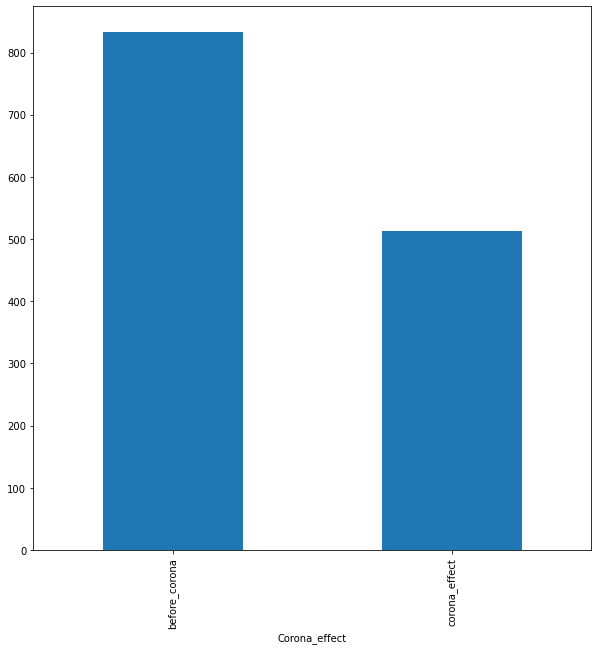

In [50]:
df.groupby('Corona_effect')['estimated_spending'].mean().plot(kind='bar',figsize=(10,10))

<AxesSubplot:xlabel='Corona_effect'>

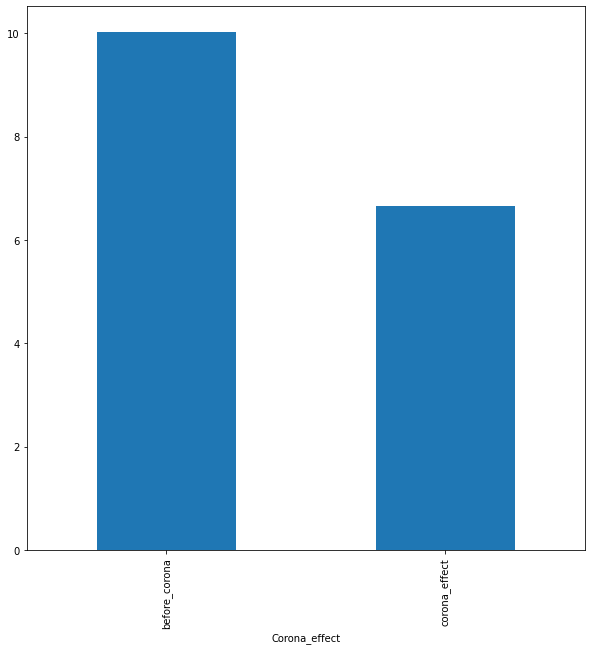

In [51]:
df.groupby('Corona_effect')['number_of_items_bought'].mean().plot(kind='bar',figsize=(10,10))

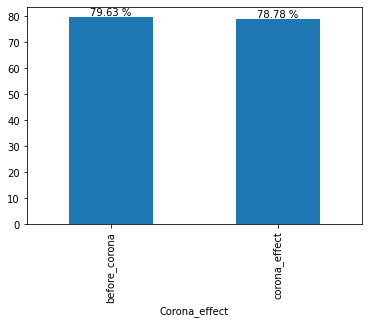

In [38]:
leadtimereg=pd.crosstab(df['Corona_effect'], df['mode_of_purchase'],normalize='index').mul(100).sort_values(by='order',ascending=False)
ax = leadtimereg['order'].plot.bar(rot=90)
ax.bar_label(ax.containers[0], fmt='%.2f %%')
ax.margins(x=15)
plt.show()

In [39]:
leadtimereg

mode_of_purchase,order,physical_collection
Corona_effect,,
before_corona,79.633153,20.366847
corona_effect,78.777064,21.222936


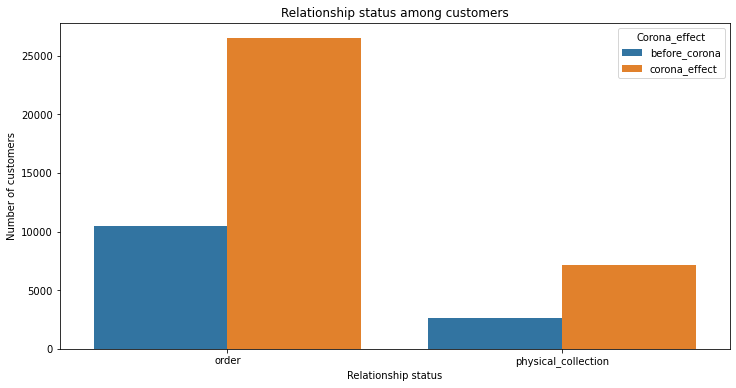

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='mode_of_purchase', data=df,hue='Corona_effect')
plt.xlabel('Relationship status')
plt.ylabel('Number of customers')
plt.title('Relationship status among customers');

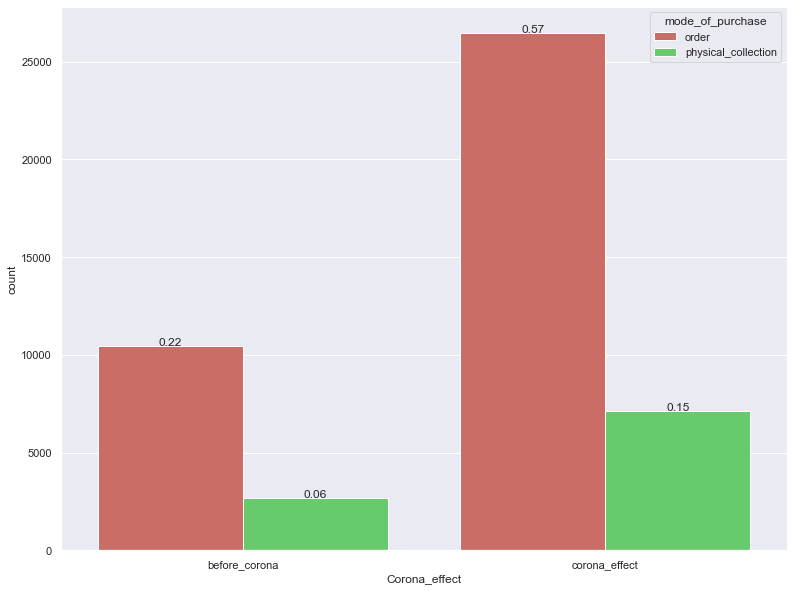

In [55]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(13,10))
ax = sns.countplot(x="Corona_effect", hue="mode_of_purchase", data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/df.shape[0]),
            ha="center")

<AxesSubplot:xlabel='seasons'>

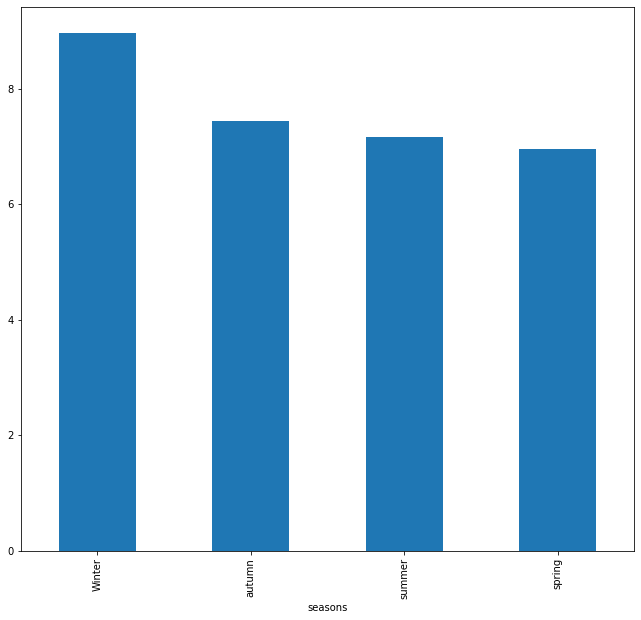

In [52]:
df.groupby('seasons')['number_of_items_bought'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(11,10))